In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Data / Goal
The goal is to predicted customers which will buy a new car. The dataset has 400 observations. Independent variables = age, salary. Dependent variable = buy a car (1) or not buy a car (0).

In [7]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although very young people tend not to earn very high salaries. It also appears young people tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

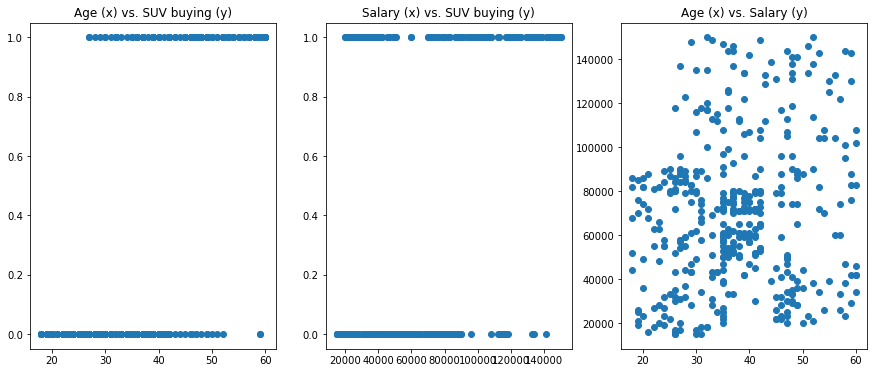

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## Logistic Regression
Logistic regression is used to predict outcomes which fall into discrete categories. It involves fitting the data against a 's' shaped logistic function, which can only take values from 0 to 1. The curve represents the probability of a prediction falling into one class vs. another class.

There are many reasons why logistic regression is more appropriate than linear regression when dealing with discrete classes. Firstly linear regression models extrapolate values outside of 0 or 1 (in a two class example). Secondly the coefficients are easier to interpret. Thirdly, linear regression assumes the outcomes are continuous. Fourthly, logistic regression can be used to predict multiple classes whilst linear regression can't.

The accuracy of the model is 89%.

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

pipeline = Pipeline([('clf', RandomForestClassifier(criterion='entropy', max_depth=5))])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)


[[64  4]
 [ 3 29]]


0.93

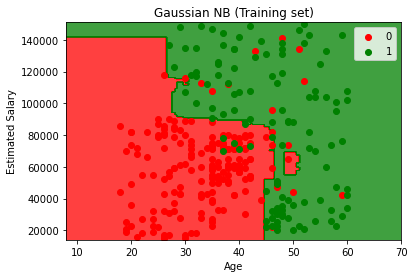

In [10]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

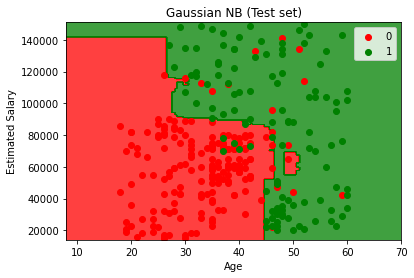

In [11]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()